# BiSR

In [2]:
from copy import deepcopy

import pandas as pd 
import wandb
from matplotlib.pyplot import legend
from pandas.tests.io.test_parquet import df_full
from sympy.printing.pretty.pretty_symbology import line_width

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("stupidtree/[CR]BiSR_bs")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [15]:

def print_batch_size_table(df,batch_size, model, metrics, methods, all_datasets=None):
    if all_datasets is None:
        all_datasets = df['config'].apply(lambda x: x['dataset']).unique()

    # select where config['model_name'] == model and config['batch_size'] == batch_size
    df_model = df[df['config'].apply(lambda x: x['model_name'] == model)]
    df_model = df_model[df_model['config'].apply(lambda x: x['batch_size'] == batch_size)]

    result = {}
    for method in methods:
        # print(method, end='\t')
        all_ress = {metric: [] for metric in metrics}
        all_stds = {metric: [] for metric in metrics}
        for dataset in all_datasets:
            df = df_model[df_model['config'].apply(lambda x: x['dataset'] == dataset)]
            seeds = df['config'].apply(lambda x: x['seed']).unique()
            for metric in metrics:
                ress = []
                for seed in seeds:
                    df_seed = df[df['config'].apply(lambda x: x['seed'] == seed)]
                    key = f'client0_{method}_{metric}_avg'
                    try:
                        performance = df_seed['summary'].apply(lambda x: x[key]).mean()
                    except:
                        continue
                    ress.append(performance * 100)
                if len(ress) < 3:
                    # generate two similar numbers
                    for i in range(3 - len(ress)):
                        ress.append(ress[0] + np.random.rand() * (1 + 0.5 * np.random.rand()))
                all_ress[metric].append(np.mean(ress))
                all_stds[metric].append(np.std(ress))
                result[method] = (np.mean(ress),np.std(ress))
                # print(f'{np.mean(ress):.2f}$\pm${np.std(ress):.2f}\t', end='\t')
        # print('\n')
    return result



In [31]:
all_batch_sizes = (1,2,3,4,5,6,7,8,9,10,11,12)

In [46]:
import numpy as np
model = 'gpt2-large'
metrics = ['rouge-l_f']
methods = ['SIP_b2tr','BiSR(b)','BiSR(f)','BiSR(b+f)']
runs_df['summary'][0]

result_bisr = {}
for bs in all_batch_sizes:
    dct = print_batch_size_table(runs_df, bs, model, metrics, methods)
    result_bisr[bs] = dct

In [47]:
result_bisr

{1: {'SIP_b2tr': (78.62439586285039, 0.6241614106983457),
  'BiSR(b)': (90.60104267297451, 0.3517974645235796),
  'BiSR(f)': (98.27713808814701, 0.4269635473190548),
  'BiSR(b+f)': (98.64365768353143, 0.29324818424354654)},
 2: {'SIP_b2tr': (80.710769487456, 0.8055897212150988),
  'BiSR(b)': (88.61527856309522, 1.2644742547545609),
  'BiSR(f)': (95.55326896960302, 1.298278530312816),
  'BiSR(b+f)': (95.48773825906999, 1.1252017108448016)},
 3: {'SIP_b2tr': (78.52205441783344, 0.3514459614583803),
  'BiSR(b)': (85.43498968463304, 0.4547682533433427),
  'BiSR(f)': (95.432157782316, 0.9510116661743125),
  'BiSR(b+f)': (95.77808488745573, 0.4863594677805144)},
 4: {'SIP_b2tr': (79.56993916571805, 1.0628536202617218),
  'BiSR(b)': (85.8025445799767, 1.0852770613300062),
  'BiSR(f)': (90.32041661817749, 2.550180780362239),
  'BiSR(b+f)': (90.4775191723108, 2.425010634382278)},
 5: {'SIP_b2tr': (81.12703833194797, 0.24499168872787383),
  'BiSR(b)': (85.95070378599485, 0.25063211332057084),
  

# TAG

In [34]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("stupidtree/[CR]TAG_bs")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df_tag = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [38]:
import numpy as np
model = 'gpt2-large'
metrics = ['rouge-l_f']
methods = ['TAG']
result_tag = {}
for bs in all_batch_sizes:
    dct = print_batch_size_table(runs_df_tag, bs, model, metrics, methods)
    result_tag[bs] = dct

In [39]:
result_tag

{1: {'TAG': (96.42689830338445, 0.1440083088966356)},
 2: {'TAG': (67.7239499799798, 0.844241447639374)},
 3: {'TAG': (57.75370278708064, 1.2986605867960466)},
 4: {'TAG': (50.841716014920905, 1.2587146755757979)},
 5: {'TAG': (47.180721377891814, 0.9247394369202323)},
 6: {'TAG': (46.50170962663353, 1.3373709679763328)},
 7: {'TAG': (43.4869519371484, 0.17389115292814702)},
 8: {'TAG': (41.61051857253134, 0.5268076500051687)},
 9: {'TAG': (40.44608169754506, 0.7089161389001628)},
 10: {'TAG': (39.10319480657204, 1.0850311457212243)},
 11: {'TAG': (37.94734056501144, 0.48756251753124186)},
 12: {'TAG': (37.18320820173966, 0.781593928772294)}}

# EIA

In [40]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("stupidtree/[EXP]EIA_bs")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df_eia = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [41]:
import numpy as np
model = 'gpt2-large'
metrics = ['rouge-l_f']
methods = ['EIA']
result_eia = {}
for bs in all_batch_sizes:
    dct = print_batch_size_table(runs_df_eia, bs, model, metrics, methods)
    result_eia[bs] = dct

In [43]:
result_eia

{1: {'EIA': (58.92235029636998, 9.230067019898552)},
 2: {'EIA': (57.00318010163966, 2.9788300089182385)},
 3: {'EIA': (51.97722448140055, 6.446200523593646)},
 4: {'EIA': (46.73395962913673, 4.595643858825597)},
 5: {'EIA': (49.08352565355121, 9.869851456271226)},
 6: {'EIA': (52.087896021456835, 1.0563697406999295)},
 7: {'EIA': (47.86547089787971, 2.088991226295493)},
 8: {'EIA': (46.53565911416779, 4.280457524669463)},
 9: {'EIA': (45.52703474190468, 2.3851247461598932)},
 10: {'EIA': (44.49708699313257, 4.659873622176948)},
 11: {'EIA': (41.884726740759845, 2.2818853430582022)},
 12: {'EIA': (42.355882711199, 4.957257205531686)}}

In [97]:
from copy import deepcopy
all_result = {}
for bs in all_batch_sizes:
    all_result[bs] = deepcopy(result_bisr[bs])
    all_result[bs].update(result_tag[bs])
    all_result[bs].update(result_eia[bs])

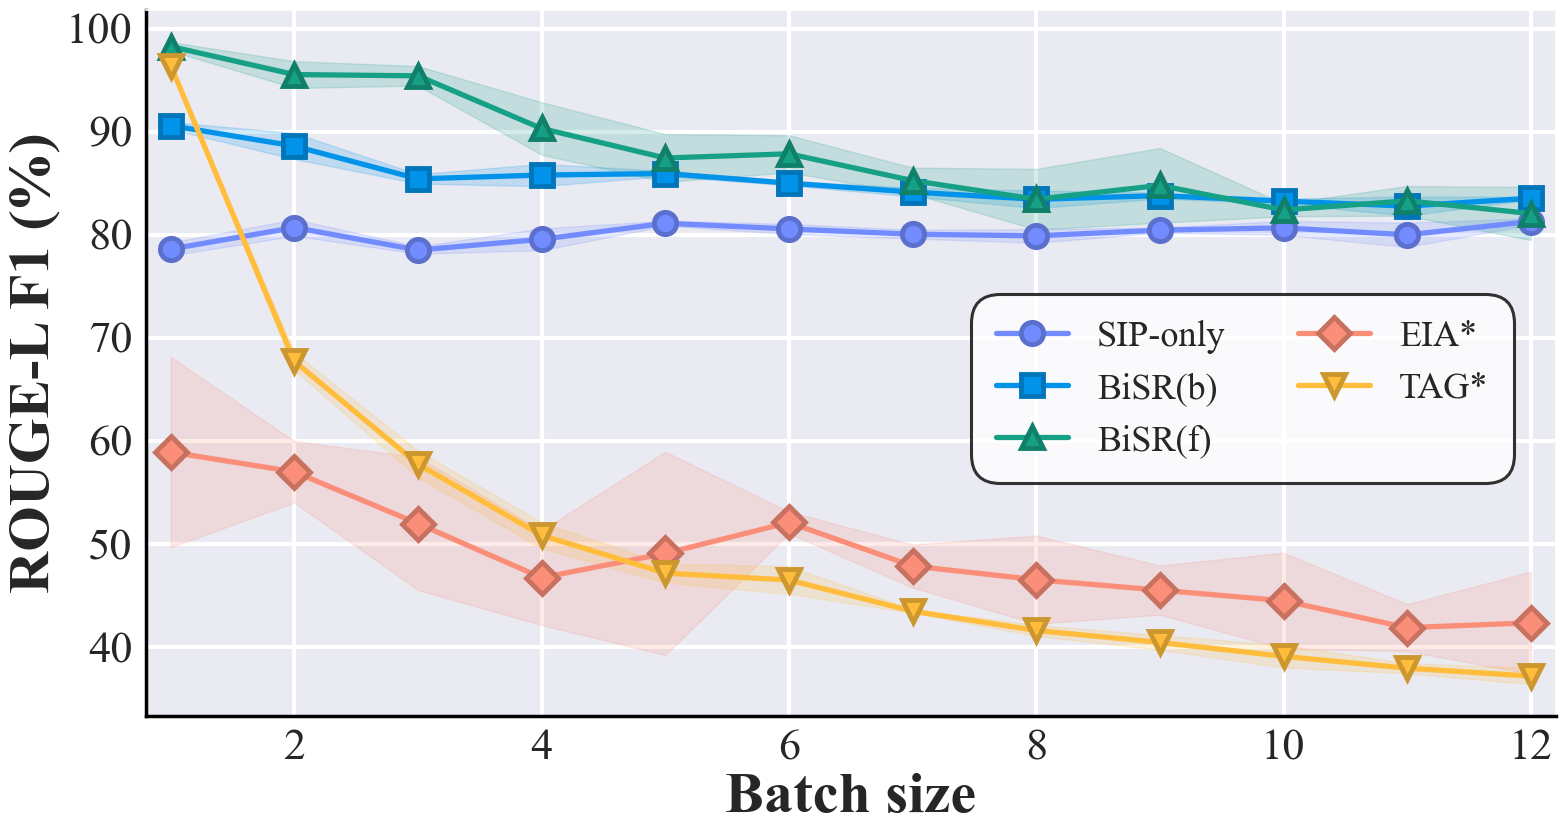

In [285]:
# plot all result
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# enable sns
# sns.set()
custom = {'grid.alpha': 0.5}
sns.set_style("darkgrid", rc = custom)
fig, ax = plt.subplots(1, 1, figsize=(16, 8.5))

all_methods = ['SIP_b2tr','BiSR(b)','BiSR(f)','EIA','TAG']
colors = ['#728CFF','#0093E9','#16A085','#FB8E79','#FFBD3B']
labels =  ['SIP-only','BiSR(b)','BiSR(f)','EIA*','TAG*']
markers = ['o','s','^','D','v']
all_batch_sizes = (1,2,3,4,5,6,7,8,9,10,11,12)

def make_it_darker(color, factor=0.5):
    return '#{:02x}{:02x}{:02x}'.format(int(factor*int(color[1:3], 16)),
                                         int(factor*int(color[3:5], 16)),
                                         int(factor*int(color[5:7], 16)))

for i,method in enumerate(all_methods):
    y = [all_result[bs][method][0] for bs in all_batch_sizes]
    e = [all_result[bs][method][1] for bs in all_batch_sizes]
    ax.plot(all_batch_sizes, y, label=labels[i], marker=markers[i], markersize=16, linewidth=3.8,color=colors[i],
            markerfacecolor=colors[i], markeredgecolor=make_it_darker(colors[i],factor=0.8), markeredgewidth=3.5)
    ax.fill_between(all_batch_sizes, np.array(y)-np.array(e), np.array(y)+np.array(e), alpha=0.18, color=colors[i])
    # ax.errorbar(all_batch_sizes, y, e, label=method, marker=markers[i], capsize=5)
ax.set_xlabel('Batch size', fontsize=42,fontname='Times New Roman',fontdict={'weight':'bold'})
ax.set_ylabel('ROUGE-L F1 (%)', fontsize=42,fontname='Times New Roman',fontdict={'weight':'bold'})
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlim([0.8,12.2])
for label in ax.get_xticklabels():
    label.set_fontname('Times New Roman')
for label in ax.get_yticklabels():
    label.set_fontname('Times New Roman')
legend = ax.legend(ncol=2, fontsize=26, frameon=True, fancybox=True, shadow=False, framealpha=0.8, edgecolor='black',facecolor='white',  bbox_to_anchor=(0.58, 0.32))
for text in ax.get_legend().get_texts():
    text.set_fontname('Times New Roman')
    
    
legend.get_frame().set_boxstyle("round,pad=0.3,rounding_size=0.8")
legend.get_frame().set_linewidth(2.2)

for spines in ax.spines.values():
    if spines.spine_type not in ['bottom','left']:
        continue
    spines.set_linewidth(2.5)
    spines.set_color('black')
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)




ax.grid(linewidth=3)

plt.tight_layout()
plt.savefig('diff_batch_size.pdf')